In [4]:
import pandas as pd
import requests
import numpy as np
import warnings
import matplotlib.pyplot as plt

In [3]:
#retirando os alertas
warnings.filterwarnings("ignore")

In [6]:
#importando dados através de url
url = 'https://www.al.sp.gov.br/repositorioDados/deputados/deputados.xml'
conexao = requests.get(url)

#fazendo a leitura dos dados
base_deputados = pd.read_xml(conexao.content)

#mostrando  as primeiras informações
base_deputados.head(5)

,IdDeputado,IdSPL,IdUA,Situacao,Andar,Aniversario,Biografia,Email,Matricula,NomeParlamentar,PathFoto,Sala,Partido,Telefone,Fax,PlacaVeiculo
0,549,1000000330,20377,EXE,3º andar,01/11,<p>Adalberto Freitas é natural de Porto Alegre...,adalbertofreitas@al.sp.gov.br,300605,Adalberto Freitas,http://www3.al.sp.gov.br/repositorio/deputadoP...,305,PSDB,(11) 3886-6557 / 6559,None,None
1,548,1000000332,20370,EXE,Térreo,09/07,<p>Com uma história de mais de duas décadas de...,adrianaborgo@al.sp.gov.br,300606,Adriana Borgo,http://www3.al.sp.gov.br/repositorio/deputadoP...,T. 45,AGIR,(11) 3886-6567/8770,None,None
2,547,1000000335,20455,EXE,2º andar,26/08,<p>Danilo Mascarenhas de Balas nasceu na cidad...,apfdanilobalas@al.sp.gov.br,300607,Agente Federal Danilo Balas,http://www3.al.sp.gov.br/repositorio/deputadoP...,255,PL,(11)3886-6052/6054,None,None
3,128,39,20384,EXE,1º,04/01,"<p style=""outline: none; color: #121212; font-...",ademarchi@al.sp.gov.br,300288,Aldo Demarchi,http://www3.al.sp.gov.br/repositorio/deputadoP...,168,UNIÃO,3886-6281/6283,None,None
4,546,1000000342,20399,EXE,1º,17/09,"<p>Alexander Muniz de Oliveira, nascido na cid...",alexdemadureira@al.sp.gov.br,300608,Alex Madureira,http://www3.al.sp.gov.br/repositorio/deputadoP...,173,PL,(11)3886-6676 / 6677,None,None


# Analises na base de dados

In [13]:
Analise = base_deputados.groupby(by=['Partido']).count().sort_values(by=['IdDeputado'], ascending=False)
Analise_Perc = round((Analise.IdDeputado.cumsum() / Analise.IdDeputado.sum()*100),3)

##  Construção do Dashboard

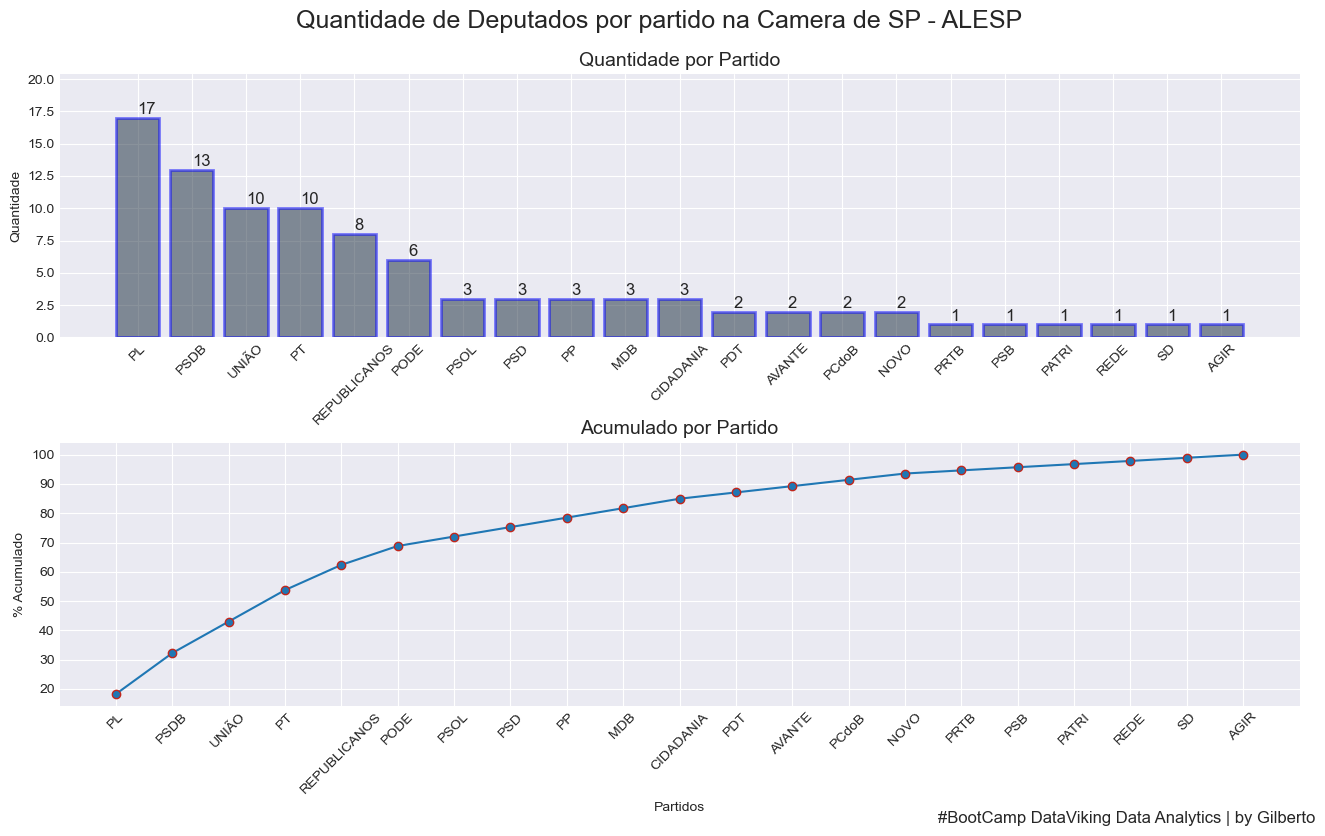

In [54]:
#construindo um gráfico
Figura = plt.figure(figsize=(16,8))
plt.style.use('seaborn-darkgrid')
plt.suptitle('Quantidade de Deputados por partido na Camera de SP - ALESP', fontsize=18)

plt.subplot(2, 1, 1)
plt.title('Quantidade por Partido', fontsize=14)
plt.bar(
    Analise.index,
    Analise.IdDeputado,
    color = '#142738',
    linewidth= 2,
    edgecolor='blue',
    alpha=0.5
)

plt.ylabel('Quantidade')
plt.xticks(rotation=45)

#ajustando a escala
plt.ylim([0, Analise.IdDeputado.max() + Analise.IdDeputado.max() * 0.2])

#adicionando os numeros nas barras
for loop in range(len(Analise)):
    plt.text(x=Analise.index[loop], y=Analise.IdDeputado[loop] + 0.3, s=Analise.IdDeputado[loop], size=12)


#dados do segundo graafico    
plt.subplot(2, 1, 2)
plt.title('Acumulado por Partido', fontsize=14)
plt.plot(
    Analise_Perc.index,
    Analise_Perc.values,
    marker='o',
    markeredgecolor='#c0261c'
)

plt.ylabel('% Acumulado')
plt.xlabel('Partidos')
plt.xticks(rotation=45)

plt.subplots_adjust(hspace=0.4, top=0.9)

Rodape = '#BootCamp DataViking Data Analytics | by Gilberto'
Figura.text(0.91, -0.04, Rodape, ha='right', va='bottom', size=12);